In [1]:
import numpy as np
import pandas as pd
import getpass
from pathlib import Path

def read_data(type,train_name, score_name):
    if getpass.getuser() == 'daniel':
        project_root_path = Path("/home/daniel/Projects/Python ML Pipeline")
        csv_path = project_root_path / 'data' / type
        # Lets read the trining dataset
        data = pd.read_csv(csv_path/  train_name)
        # Now we read the training data set
        score = pd.read_csv(csv_path /  score_name)
    return (data,score)

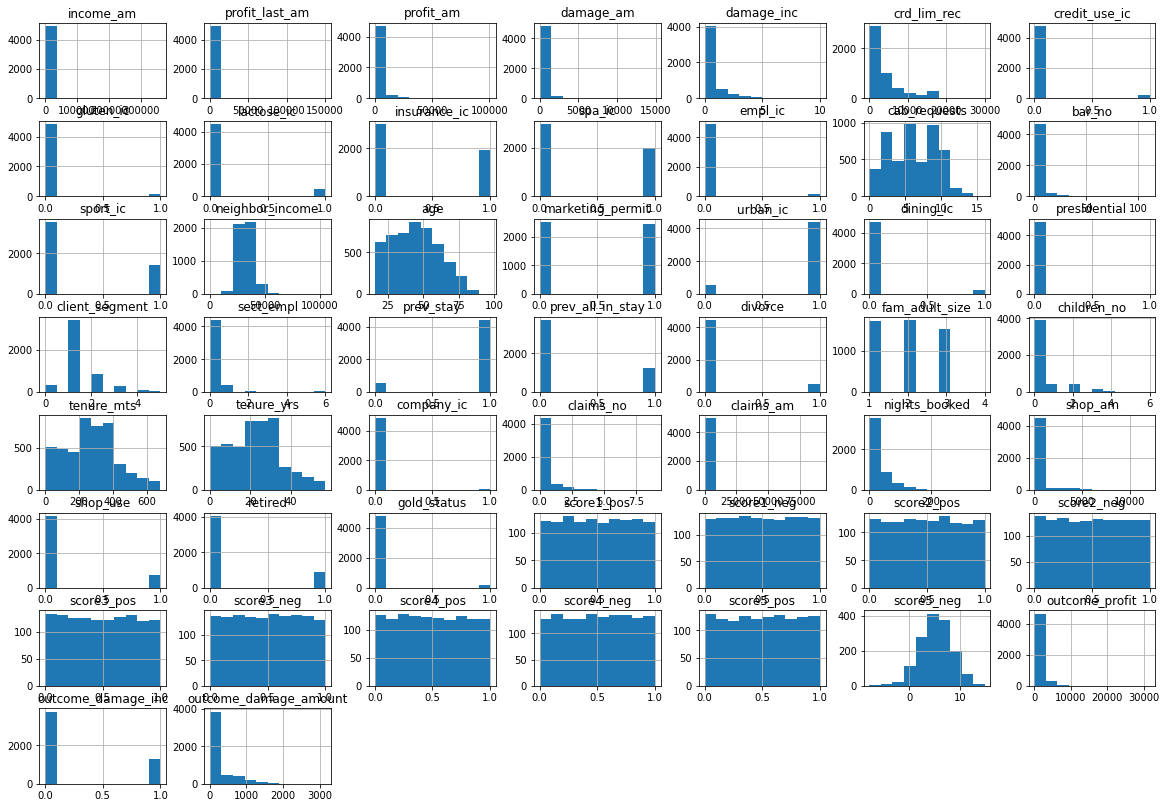

In [3]:
data_dict = {'type': 'raw', 'train_name': 'train_V2.csv', 'score_name': 'score.csv'}
data_raw, score_raw = read_data(**data_dict)
_ = data_raw.hist(figsize=(20, 14))

In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

In [29]:
data_raw.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,...,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


In [38]:
data_feat = data_raw.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'], axis=1)


## Identify categorical variables
Let's think about some potentially categorical or binary  features

In [40]:
print(data_feat['client_segment'].value_counts())
print(data_feat['sect_empl'].value_counts())
data_feat['gender'].value_counts()

1.0    3389
2.0     837
0.0     319
3.0     284
4.0      81
5.0      37
Name: client_segment, dtype: int64
0.0    4372
1.0     433
6.0      71
2.0      42
4.0      26
3.0       3
Name: sect_empl, dtype: int64


M    2490
V    2457
Name: gender, dtype: int64

In [35]:

df = data_feat

x = df.nunique()
df[list(x[x<=2].index)]

,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,married_cd,sport_ic,marketing_permit,urban_ic,dining_ic,presidential,prev_stay,prev_all_in_stay,divorce,company_ic,gender,shop_use,retired,gold_status
0,0.0,0.0,0.0,0.0,1.0,0.0,True,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,M,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,True,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,M,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,True,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,V,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,False,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,V,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,1.0,0.0,True,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,V,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,M,0.0,1.0,0.0
4997,0.0,0.0,0.0,1.0,0.0,0.0,False,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,V,0.0,1.0,0.0
4998,0.0,0.0,0.0,1.0,0.0,0.0,True,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,V,0.0,0.0,0.0


In [36]:
binary_variables = df[list(x[x<=2].index)].columns
binary_variables

Index(['credit_use_ic', 'gluten_ic', 'lactose_ic', 'insurance_ic', 'spa_ic',
       'empl_ic', 'married_cd', 'sport_ic', 'marketing_permit', 'urban_ic',
       'dining_ic', 'presidential', 'prev_stay', 'prev_all_in_stay', 'divorce',
       'company_ic', 'gender', 'shop_use', 'retired', 'gold_status'],
      dtype='object')

In [28]:
df[list(x[x>2].index)]

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,cab_requests,bar_no,neighbor_income,age,...,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,3.0,2.0,28936.0,37.0,...,NaN,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,7.0,3.0,16674.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,1.0,4.0,32552.0,21.0,...,0.232375,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,6.0,8.0,32252.0,37.0,...,NaN,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,4.0,2.0,29605.0,26.0,...,NaN,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,584.0,52.0,1769.0,0.0,0.0,0.0,10.0,4.0,31393.0,21.0,...,NaN,NaN,0.745643,0.295942,0.830932,0.071366,0.313204,3.739346,2172.82,0.00
4996,227.0,0.0,1620.0,0.0,0.0,0.0,7.0,5.0,26329.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1057.83,0.00
4997,239.0,5.0,2068.0,0.0,0.0,2500.0,1.0,8.0,27975.0,61.0,...,0.417817,0.049782,NaN,NaN,0.544873,0.331139,NaN,NaN,188.77,0.00
4998,1068.0,104.0,6405.0,490.0,2.0,15000.0,5.0,8.0,34643.0,47.0,...,NaN,NaN,NaN,NaN,0.580246,0.388815,NaN,NaN,1863.41,0.00


In [41]:
df2 = df[df.columns.difference(binary_variables)]
df2.columns

Index(['age', 'bar_no', 'cab_requests', 'children_no', 'claims_am',
       'claims_no', 'client_segment', 'crd_lim_rec', 'damage_am', 'damage_inc',
       'fam_adult_size', 'income_am', 'neighbor_income', 'nights_booked',
       'profit_am', 'profit_last_am', 'score1_neg', 'score1_pos', 'score2_neg',
       'score2_pos', 'score3_neg', 'score3_pos', 'score4_neg', 'score4_pos',
       'score5_neg', 'score5_pos', 'sect_empl', 'shop_am', 'tenure_mts',
       'tenure_yrs'],
      dtype='object')

<AxesSubplot:>

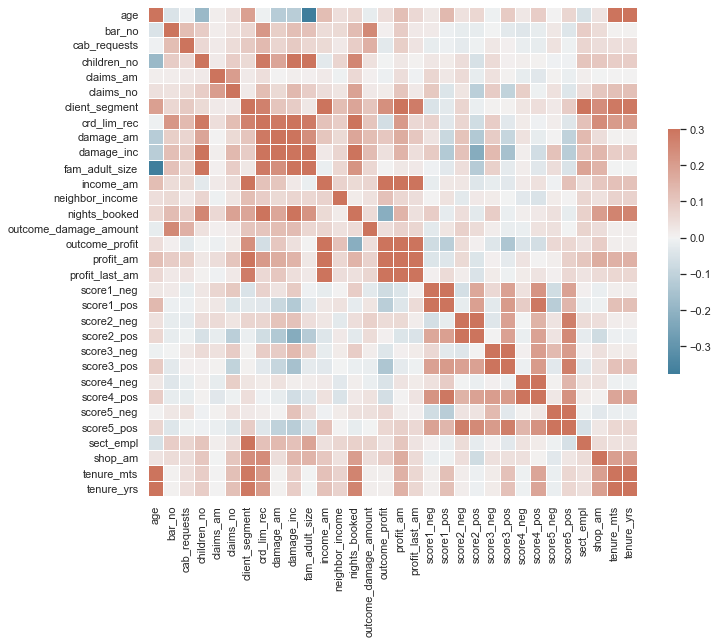

In [33]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})